In [1]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
import xgboost as xgb
import sqlite3
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
seed = 42

In [3]:
file1 = "individuos_conexoes.csv"
file2 = "individuos_espec_tratada.csv"
file3 = "conexoes_espec.csv"
file4 = "individuos_conexoes_test.csv"

## Funções Auxiliares

## Carregando as Tabela Conexões Indivíduos

In [4]:
# df_individuos_conexoes = pd.read_csv(file1, sep=';') # com os dados faltantes dos individuos preenchidos
df_individuos_conexoes = pd.read_csv(file4, sep=';') # base com os dados faltantes dos individuos retirados
df_individuos_conexoes

,idade1,estado_civil1,qt_filhos1,estuda1,trabalha1,pratica_esportes1,transporte_mais_utilizado1,IMC1,idade2,estado_civil2,qt_filhos2,estuda2,trabalha2,pratica_esportes2,transporte_mais_utilizado2,IMC2,grau,proximidade,prob_V1_V2
0,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,trabalho,visita_frequente,0.589462
1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,trabalho,visita_rara,0.708465
2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,trabalho,visita_casual,NaN
3,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,trabalho,visita_rara,0.638842
4,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,24.0,divorciado,0.0,0.0,0.0,1.0,publico,26.866953,trabalho,visita_frequente,0.658706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329113,47.0,casado,1.0,0.0,1.0,1.0,publico,31.921363,28.0,casado,1.0,1.0,1.0,0.0,particular,18.183257,trabalho,visita_casual,0.603042
329114,16.0,solteiro,3.0,1.0,0.0,0.0,publico,26.053920,66.0,divorciado,1.0,0.0,1.0,1.0,particular,19.363203,trabalho,visita_casual,0.621816
329115,23.0,casado,0.0,1.0,1.0,0.0,publico,22.036885,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771,trabalho,visita_rara,NaN
329116,23.0,casado,0.0,1.0,1.0,0.0,publico,22.036885,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402,trabalho,visita_rara,NaN


In [5]:
df_individuos_conexoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329118 entries, 0 to 329117
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   idade1                      329118 non-null  float64
 1   estado_civil1               329118 non-null  object 
 2   qt_filhos1                  329118 non-null  float64
 3   estuda1                     329118 non-null  float64
 4   trabalha1                   329118 non-null  float64
 5   pratica_esportes1           329118 non-null  float64
 6   transporte_mais_utilizado1  329118 non-null  object 
 7   IMC1                        329118 non-null  float64
 8   idade2                      329118 non-null  float64
 9   estado_civil2               329118 non-null  object 
 10  qt_filhos2                  329118 non-null  float64
 11  estuda2                     329118 non-null  float64
 12  trabalha2                   329118 non-null  float64
 13  pratica_esport

In [6]:
df_individuos_conexoes.isnull().sum()

idade1                             0
estado_civil1                      0
qt_filhos1                         0
estuda1                            0
trabalha1                          0
pratica_esportes1                  0
transporte_mais_utilizado1         0
IMC1                               0
idade2                             0
estado_civil2                      0
qt_filhos2                         0
estuda2                            0
trabalha2                          0
pratica_esportes2                  0
transporte_mais_utilizado2         0
IMC2                               0
grau                               0
proximidade                        0
prob_V1_V2                    164651
dtype: int64

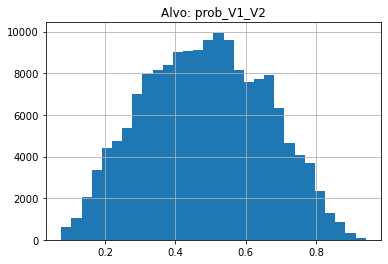

In [7]:
df_individuos_conexoes.prob_V1_V2.hist(bins=30).set_title('Alvo: prob_V1_V2');

In [8]:
df_total = pd.get_dummies(df_individuos_conexoes, columns=['qt_filhos1', 'estado_civil1', 'qt_filhos2', 'estado_civil2', 'transporte_mais_utilizado1', 'transporte_mais_utilizado2', 'grau', 'proximidade'])

## Tratando e Criando Novas Variáveis

### Fatiando os IMCs e trabalhando com um dataframe separado

In [9]:
df_total['IMC1_cut'] = pd.qcut(df_total.IMC1, 10, labels=False)
df_total['IMC2_cut'] = pd.qcut(df_total.IMC2, 10, labels=False)
df_total = df_total.drop(['IMC1', 'IMC2'], axis=1)

In [10]:
df_total.columns

Index(['idade1', 'estuda1', 'trabalha1', 'pratica_esportes1', 'idade2',
       'estuda2', 'trabalha2', 'pratica_esportes2', 'prob_V1_V2',
       'qt_filhos1_0.0', 'qt_filhos1_1.0', 'qt_filhos1_2.0', 'qt_filhos1_3.0',
       'qt_filhos1_4.0', 'qt_filhos1_5.0', 'qt_filhos1_6.0', 'qt_filhos1_7.0',
       'qt_filhos1_8.0', 'estado_civil1_casado', 'estado_civil1_divorciado',
       'estado_civil1_solteiro', 'estado_civil1_viuvo', 'qt_filhos2_0.0',
       'qt_filhos2_1.0', 'qt_filhos2_2.0', 'qt_filhos2_3.0', 'qt_filhos2_4.0',
       'qt_filhos2_5.0', 'qt_filhos2_6.0', 'qt_filhos2_7.0', 'qt_filhos2_8.0',
       'estado_civil2_casado', 'estado_civil2_divorciado',
       'estado_civil2_solteiro', 'estado_civil2_viuvo',
       'transporte_mais_utilizado1_particular',
       'transporte_mais_utilizado1_publico', 'transporte_mais_utilizado1_taxi',
       'transporte_mais_utilizado2_particular',
       'transporte_mais_utilizado2_publico', 'transporte_mais_utilizado2_taxi',
       'grau_amigos', 'g

### Criando variáveis para pegar as não linearidades

In [11]:
df_total['hex_cat_todos'] = \
df_total.estado_civil1_divorciado*2**0 + df_total.estado_civil1_solteiro*2**1 + df_total.estado_civil1_viuvo*2**2 + df_total.estado_civil1_casado*2**3 + \
df_total.estado_civil2_divorciado*2**4 + df_total.estado_civil2_solteiro*2**5 + df_total.estado_civil2_viuvo*2**6 + df_total.estado_civil2_casado*2**7 + \
df_total.transporte_mais_utilizado1_publico*2**8 + df_total.transporte_mais_utilizado1_taxi*2**9 + df_total.transporte_mais_utilizado1_particular*2**10 + \
df_total.transporte_mais_utilizado2_publico*2**11 + df_total.transporte_mais_utilizado2_taxi*2**12 + df_total.transporte_mais_utilizado2_particular*2**13 + \
df_total.grau_familia*2**14 + df_total.grau_trabalho*2**15 + df_total.grau_amigos*2**16 + \
df_total.proximidade_visita_casual*2**17 + df_total.proximidade_visita_frequente*2**18 + df_total.proximidade_visita_rara*2**14 + df_total.proximidade_mora_junto*2**19 + \
df_total.estuda1*2**20 + df_total.trabalha1*2**21 + df_total.pratica_esportes1*2**22 + \
df_total.estuda2*2**23 + df_total.trabalha2*2**24 + df_total.pratica_esportes2*2**25 + \
df_total.pratica_esportes1*2**26 + df_total.pratica_esportes2*2**27

In [12]:
df_total

,idade1,estuda1,trabalha1,pratica_esportes1,idade2,estuda2,trabalha2,pratica_esportes2,prob_V1_V2,qt_filhos1_0.0,...,grau_amigos,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara,IMC1_cut,IMC2_cut,hex_cat_todos
0,44.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0.589462,0,...,0,0,1,0,0,1,0,5,7,240421249.0
1,44.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.708465,0,...,0,0,1,0,0,0,1,5,4,240181537.0
2,24.0,0.0,0.0,1.0,50.0,1.0,1.0,0.0,NaN,1,...,0,0,1,0,1,0,0,7,7,96635272.0
3,24.0,0.0,0.0,1.0,30.0,1.0,0.0,1.0,0.638842,1,...,0,0,1,0,0,0,1,7,1,247515432.0
4,30.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0.658706,0,...,0,0,1,0,0,1,0,1,7,240421138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329113,47.0,0.0,1.0,1.0,28.0,1.0,1.0,0.0,0.603042,0,...,0,0,1,0,1,0,0,9,2,98738568.0
329114,16.0,1.0,0.0,0.0,66.0,0.0,1.0,1.0,0.621816,0,...,0,0,1,0,1,0,0,7,3,185770258.0
329115,23.0,1.0,1.0,0.0,34.0,0.0,1.0,1.0,NaN,1,...,0,0,1,0,0,0,1,5,2,187746696.0
329116,23.0,1.0,1.0,0.0,40.0,0.0,1.0,1.0,NaN,1,...,0,0,1,0,0,0,1,5,6,187752840.0


### Criando uma variável de agrupamento com os dados

In [13]:
x_estudo = df_total.drop('prob_V1_V2', axis=1)

In [14]:
min_clusters = 3
max_clusters = 12

inertias = np.zeros(shape=(max_clusters - min_clusters + 1,))

In [15]:
for i in range(min_clusters, max_clusters + 1):
    km = KMeans(n_clusters=i, random_state=seed)
    km.fit(x_estudo)
    inertias[i - min_clusters] = km.inertia_

Text(0, 0.5, 'Soma da distância quadrada')

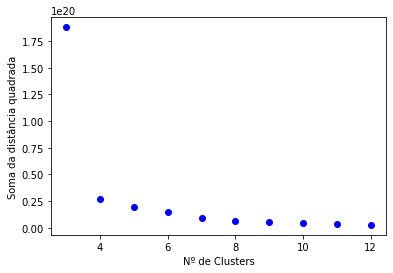

In [16]:
plt.plot(range(min_clusters, max_clusters + 1), inertias, 'bo')
plt.xlabel('Nº de Clusters')
plt.ylabel('Soma da distância quadrada')
# plt.annotate('nº de clusters escolhido', xy=(7, 80000), xytext=(8,150000), arrowprops=dict(facecolor='red', shrink=0.05))
# plt.annotate('nº de clusters escolhido', xy=(5, 150000), xytext=(6,200000), arrowprops=dict(facecolor='red', shrink=0.1))

In [17]:
n_clusters = 5
kmodel = KMeans(n_clusters=n_clusters, random_state=seed)
clusters = kmodel.fit(x_estudo)
clusters.labels_

array([1, 1, 2, ..., 3, 3, 3], dtype=int32)

In [18]:
df_total['cluster'] = clusters.labels_
df_total

,idade1,estuda1,trabalha1,pratica_esportes1,idade2,estuda2,trabalha2,pratica_esportes2,prob_V1_V2,qt_filhos1_0.0,...,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara,IMC1_cut,IMC2_cut,hex_cat_todos,cluster
0,44.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0.589462,0,...,0,1,0,0,1,0,5,7,240421249.0,1
1,44.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.708465,0,...,0,1,0,0,0,1,5,4,240181537.0,1
2,24.0,0.0,0.0,1.0,50.0,1.0,1.0,0.0,NaN,1,...,0,1,0,1,0,0,7,7,96635272.0,2
3,24.0,0.0,0.0,1.0,30.0,1.0,0.0,1.0,0.638842,1,...,0,1,0,0,0,1,7,1,247515432.0,1
4,30.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0.658706,0,...,0,1,0,0,1,0,1,7,240421138.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329113,47.0,0.0,1.0,1.0,28.0,1.0,1.0,0.0,0.603042,0,...,0,1,0,1,0,0,9,2,98738568.0,2
329114,16.0,1.0,0.0,0.0,66.0,0.0,1.0,1.0,0.621816,0,...,0,1,0,1,0,0,7,3,185770258.0,3
329115,23.0,1.0,1.0,0.0,34.0,0.0,1.0,1.0,NaN,1,...,0,1,0,0,0,1,5,2,187746696.0,3
329116,23.0,1.0,1.0,0.0,40.0,0.0,1.0,1.0,NaN,1,...,0,1,0,0,0,1,5,6,187752840.0,3


-------------

## Separa a base em 'com Alvo' e 'sem Alvo'

In [19]:
df_estudo = df_total[~df_total['prob_V1_V2'].isnull()].copy()
df_avalicao = df_total[df_total['prob_V1_V2'].isnull()].copy()

### Inicia-se os estudos de correlação

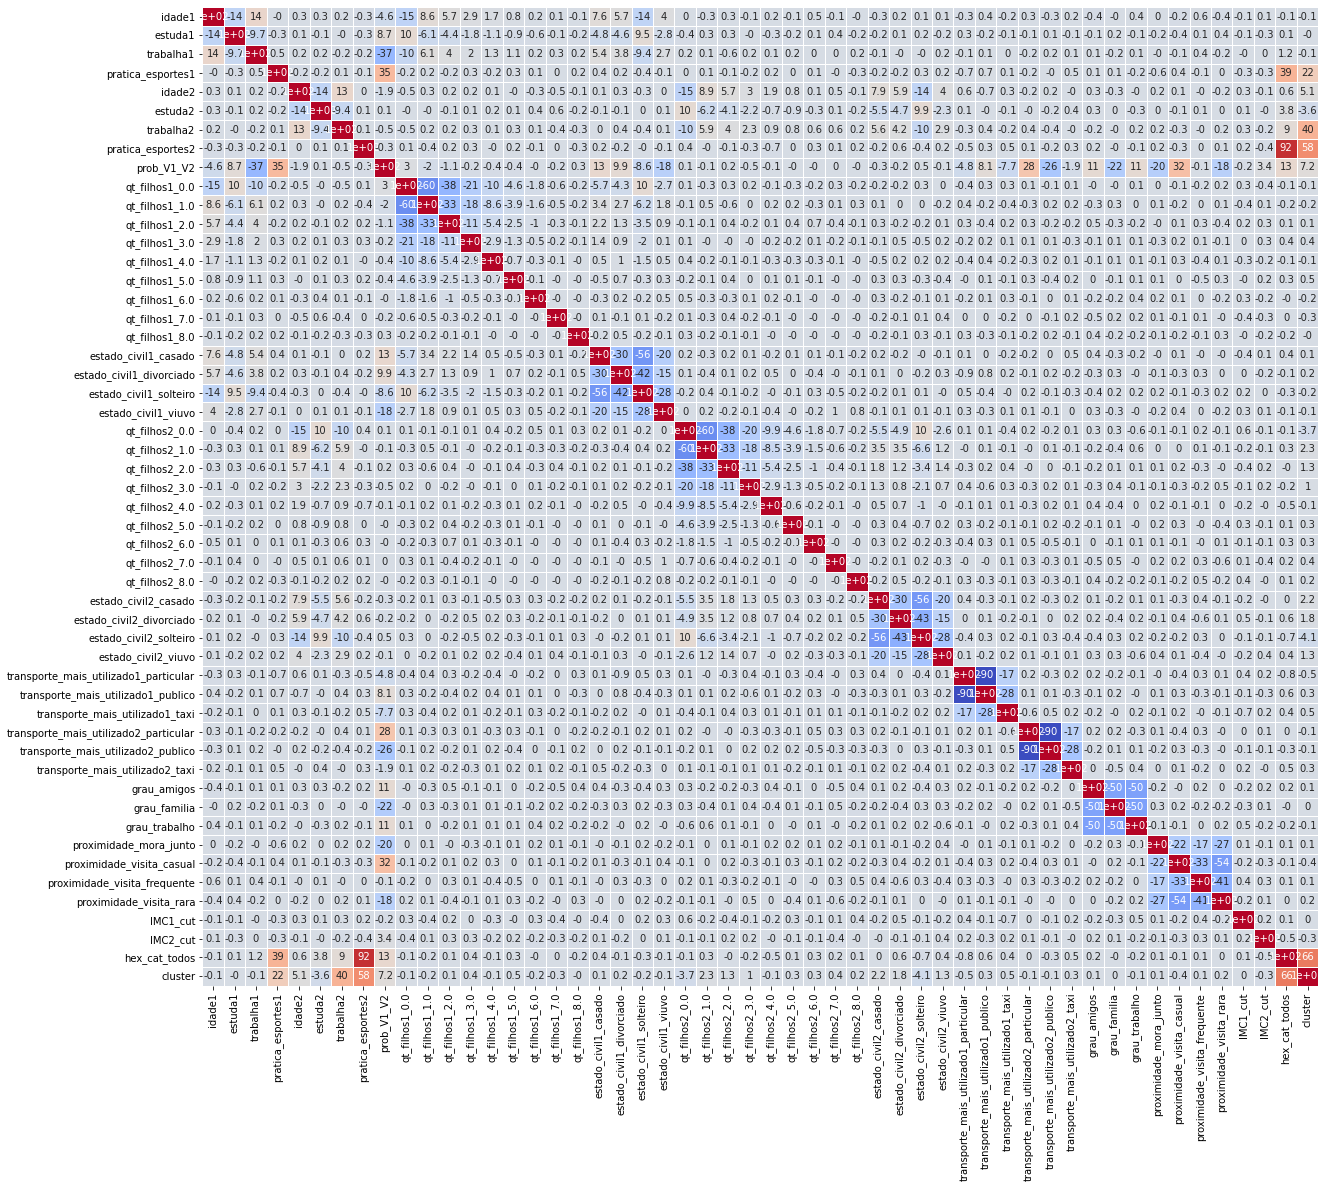

In [20]:
correl_hm = df_estudo.corr()
plt.figure(figsize=(20, 18))
sbn.heatmap(round(correl_hm*100, 1), cmap='coolwarm', annot=True, linewidths=0.6, cbar=False);
plt.savefig('correlacao.jpg')

### Retira-se as variáves mais correlacionados entre si

In [21]:
correl_abs = df_estudo.corr().abs()
superior = correl_abs.where(np.triu(np.ones(correl_abs.shape), k=1).astype(np.bool))
var_remove = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]
df_uso = df_estudo.drop(df_estudo[var_remove], axis=1)
var_remove

['qt_filhos1_1.0',
 'estado_civil1_solteiro',
 'qt_filhos2_1.0',
 'estado_civil2_solteiro',
 'transporte_mais_utilizado1_publico',
 'transporte_mais_utilizado2_publico',
 'grau_trabalho',
 'proximidade_visita_rara',
 'hex_cat_todos',
 'cluster']

In [22]:
x_estudo = df_uso.drop('prob_V1_V2', axis=1)
y_estudo = df_uso['prob_V1_V2']

In [23]:
x_estudo

,idade1,estuda1,trabalha1,pratica_esportes1,idade2,estuda2,trabalha2,pratica_esportes2,qt_filhos1_0.0,qt_filhos1_2.0,...,transporte_mais_utilizado1_taxi,transporte_mais_utilizado2_particular,transporte_mais_utilizado2_taxi,grau_amigos,grau_familia,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,IMC1_cut,IMC2_cut
0,44.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,1,5,7
1,44.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0,0,...,0,1,0,0,0,0,0,0,5,4
3,24.0,0.0,0.0,1.0,30.0,1.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,0,7,1
4,30.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0,1,...,0,0,0,0,0,0,0,1,1,7
13,26.0,0.0,0.0,0.0,45.0,0.0,1.0,1.0,1,0,...,0,0,0,0,0,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329111,23.0,1.0,0.0,1.0,40.0,0.0,1.0,1.0,1,0,...,0,1,0,0,1,0,1,0,3,9
329112,33.0,0.0,1.0,1.0,17.0,0.0,1.0,1.0,0,0,...,0,0,0,0,0,0,1,0,8,4
329113,47.0,0.0,1.0,1.0,28.0,1.0,1.0,0.0,0,0,...,0,1,0,0,0,0,1,0,9,2
329114,16.0,1.0,0.0,0.0,66.0,0.0,1.0,1.0,0,0,...,0,1,0,0,0,0,1,0,7,3


---------

## Modelo de Regressão

### Dividindo a base em treinamento e teste

In [24]:
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x_estudo, y_estudo, test_size=test_size, random_state=seed)

### Criando o modelo de regressão e treinando o modelo

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Executando as predições

In [26]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

### Medindo os Resultados das Predições

In [27]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
R2_train = metrics.r2_score(y_train, y_pred_train)
RMSE_train = math.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
R2_test = metrics.r2_score(y_test, y_pred_test)
RMSE_test = math.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('Avaliação do Treinamento')
print('MAE:', round(MAE_train ,2))
print('R2:', round(R2_train ,2))
print('RMSE:', round(RMSE_train ,2))
print('------------------------')
print('Avaliação do Teste')
print('MAE:', round(MAE_test ,2))
print('R2:', round(R2_test ,2))
print('RMSE:', round(RMSE_test ,2))

Avaliação do Treinamento
MAE: 0.09
R2: 0.59
RMSE: 0.11
------------------------
Avaliação do Teste
MAE: 0.09
R2: 0.59
RMSE: 0.11


In [28]:
print(round(y_test.mean(), 2))
print(round(MAE_test/y_test.mean()*100, 2))

0.48
18.57


In [29]:
lr.intercept_

0.41450925779484227

In [30]:
coef = pd.DataFrame(lr.coef_, x_estudo.columns)
coef.columns = ['Coeficientes']
coef

,Coeficientes
idade1,-7.770012e-05
estuda1,2.194847e-02
trabalha1,-1.318363e-01
pratica_esportes1,1.238999e-01
idade2,-2.731386e-04
estuda2,-3.173633e-04
trabalha2,-1.047739e-03
pratica_esportes2,-6.475535e-04
qt_filhos1_0.0,-6.322055e-04
qt_filhos1_2.0,4.373636e-04


### Comparando os resultados de reais com os previstos

In [31]:
resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_test})
resultados

,Real,Previsto
30748,0.707640,0.568739
208398,0.779017,0.713654
32265,0.442873,0.382349
193660,0.499668,0.447538
224128,0.456749,0.461349
...,...,...
152619,0.371708,0.421148
140051,0.842755,0.844113
276708,0.329065,0.372999
107274,0.724258,0.490486


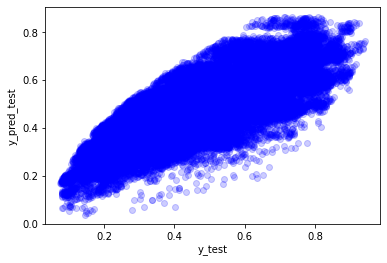

In [32]:
plt.plot(y_test, y_pred_test, 'bo', alpha=0.2);
plt.xlabel('y_test');
plt.ylabel('y_pred_test');

### Testou-se também um modelo com XGBoost Regression

In [33]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', booster='gblinear', n_estimators=100, seed=seed) 

#### Otimizando alguns parâmetros

In [35]:
params = {
        'learning_rate': [0.02, 0.2, 0.5],
        'n_estimators': [50, 100, 300, 600],
        'num_boost_round': [10, 25, 50],
        'eta': [0.05, 0.1, 0.3],
        'max_depth': [2, 5, 10, 15, 20], 
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

In [36]:
from sklearn.model_selection import KFold

folds = 2
param_comb = 7

k_fold = KFold(n_splits=folds, shuffle=True, random_state=0)
random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, cv=k_fold.split(x_train, y_train), n_jobs=4, verbose=3, return_train_score=True, random_state=seed )

In [37]:
%%time
random_search.fit(x_train, y_train)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[23:08:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bytree, gamma, max_depth, num_boost_round, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


CPU times: user 13.4 s, sys: 1.31 s, total: 14.7 s
Wall time: 22.1 s


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe05b1ed550>,
                   estimator=XGBRegressor(base_score=None, booster='gblinear',
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, mi...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=7, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                              

In [39]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 Best estimator:
XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.6, eta=0.1, gamma=5,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=20,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=8, num_boost_round=50,
             num_parallel_tree=None, random_state=42, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=1, seed=42, subsample=1.0, tree_method=None,
             validate_parameters=1, verbosity=None)

 Best normalized gini score for 2-fold search with 7 parameter combinations:
0.18490154738625608

 Best hyperparameters:
{'subsample': 1.0, 'num_boost_round': 50, 'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.5, 'gamma': 5, 'eta': 0.1, 'colsample_bytree': 0.6}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_num_boost_round,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,...,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,1.097291,0.022116,0.030468,0.001968,1.0,10,50,10,0.5,2,...,"{'subsample': 1.0, 'num_boost_round': 10, 'n_e...",0.593465,0.589226,0.591346,0.002120,5,0.589777,0.593820,0.591798,0.002021
1,11.866635,0.025218,0.035501,0.004513,0.6,10,600,15,0.02,5,...,"{'subsample': 0.6, 'num_boost_round': 10, 'n_e...",0.591484,0.587377,0.589430,0.002053,6,0.587830,0.591910,0.589870,0.002040
2,11.901384,0.076299,0.034968,0.002108,1.0,25,600,15,0.2,1,...,"{'subsample': 1.0, 'num_boost_round': 25, 'n_e...",0.594461,0.590416,0.592438,0.002023,2,0.590871,0.594900,0.592886,0.002014
3,6.008304,0.003456,0.032126,0.000309,1.0,50,300,20,0.5,5,...,"{'subsample': 1.0, 'num_boost_round': 50, 'n_e...",0.594467,0.590435,0.592451,0.002016,1,0.590884,0.594913,0.592899,0.002014
4,2.088754,0.026344,0.031974,0.000058,1.0,10,100,20,0.5,5,...,"{'subsample': 1.0, 'num_boost_round': 10, 'n_e...",0.594294,0.590108,0.592201,0.002093,3,0.590656,0.594642,0.592649,0.001993
5,2.044273,0.014984,0.027563,0.001663,0.6,25,100,10,0.02,1.5,...,"{'subsample': 0.6, 'num_boost_round': 25, 'n_e...",0.515693,0.511649,0.513671,0.002022,7,0.511860,0.516371,0.514116,0.002256
6,1.254286,0.046369,0.017369,0.001270,0.8,50,100,15,0.5,0.5,...,"{'subsample': 0.8, 'num_boost_round': 50, 'n_e...",0.594237,0.590118,0.592177,0.002060,4,0.590588,0.594656,0.592622,0.002034


[23:07:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bytree, gamma, max_depth, num_boost_round, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV 2/2] END colsample_bytree=0.8, eta=0.3, gamma=5, learning_rate=0.02, max_depth=15, n_estimators=600, num_boost_round=10, subsample=0.6;, score=(train=0.592, test=0.587) total time=  11.9s
[23:07:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bytree, gamma, max_depth, num_boost_round, subsample } might not be used.

  This may not be accurate due to some parameters are only used i

In [ ]:
y_pred_train_reg = random_search.predict(x_train)
y_pred_test_reg = random_search.predict(x_test)

In [ ]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train_reg)
R2_train = metrics.r2_score(y_train, y_pred_train_reg)
RMSE_train = math.sqrt(metrics.mean_squared_error(y_train, y_pred_train_reg))

MAE_test = metrics.mean_absolute_error(y_test, y_pred_test_reg)
R2_test = metrics.r2_score(y_test, y_pred_test_reg)
RMSE_test = math.sqrt(metrics.mean_squared_error(y_test, y_pred_test_reg))

print('Avaliação do Treinamento')
print('MAE:', round(MAE_train ,2))
print('R2:', round(R2_train ,2))
print('RMSE:', round(RMSE_train ,2))
print('------------------------')
print('Avaliação do Teste')
print('MAE:', round(MAE_test ,2))
print('R2:', round(R2_test ,2))
print('RMSE:', round(RMSE_test ,2))

In [ ]:
resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_test_reg})
resultados

In [ ]:
plt.plot(y_test, y_pred_test_reg, 'bo', alpha=0.2);
plt.xlabel('y_test');
plt.ylabel('y_pred_test_reg');